<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Algoritmos Genéticos</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;"> Inteligencia Artificial y mini-robots</p>

<p style="font-size:210%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Prof. José J. Martínez P. (josejesusmp@gmail.com)
</p>


<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Ingeniería Mecánica, Sistemas y Electrónica</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="../../figs/Escudo_UN.png",width=100,height=100>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>2022</p>

## Ejercicios

1. Encontrar, usando el método de AGs, la raíz real del polinomio $P(x) = 5x^5- 3x^4-x^3-5x^2-x-3$ en el intervalo [0.5 1], usando números reales, una población de 100 listas, un solo tipo de cruce y selección por clasificación. Dibuje un cuadro de aptitud contra generación. 

2. Genere aleatoriamente una población de 50 conversaciones de 1 segundo, que se escuche por el parlante del computador. La función de aptitud es una conversación suya de 1 segundo.

3. Tome una imagen a color de una persona, luego conviértala a una escala de grises de 9 valores. Luego, replique esa imagen 50 veces.  Ahora tome cada imagen gris y a cada píxel de la imagen gris aleatoriamente asígnele un color RGB y genere 50 imágenes a color con base en esa asignación.  La función de aptitud es la imagen a color original. Corra el algoritmo genético hasta cuando una de las imágenes concuerde en un 90% con la imagen original. Use enteros.

4. Tome un ejemplo de uso de una librería Python de AGs y desarróllelo completamente.
 
5. Suponga que tiene una lista de 15 alimentos con número de calorías, gramos de proteína, gramos de grasa y gramos de carbohidratos. Suponga que un individuo debe consumir determinada cantidad de calorías, proteínas, grasa y carbohidratos. Genere una dieta para ese individuo. ( u otro similar).

## Desarrollo


### 1. Raíz de un polinomio

El código es proporcionado por el profesor, solo se comenta en algunos casos.

In [4]:
# Librerias

import math               # Libreria que se usa para realizar operaciones matemáticas y funciones
import random             # Libreria usada para generar números aleatorios
import numpy as np        # Libreria para hacer operaciones matemáticas
import matplotlib.pyplot as plt
import pygad               # Libreria open-source para Algorítmos genéticos en python
import sounddevice as sd
import scipy.io.wavfile as wf
from playsound import playsound
import os

In [35]:
# Funciones

global longCrom # número de genes del cromosoma
global K # Número de cromosomas
global M # Generaciones
global pm  # Probabilidad de mutación
global prob_cromosoma
global xi # Limite inferior en el dominio real
global xf # Limite superior en el dominio real


def ecuacion(x):
    valor = 5*x**5-3*x**4-x**3-5*x**2-x-3
    return valor


def genera(K,longCrom):
    Pob_nueva = np.zeros([K, longCrom], dtype = int)
    cromosoma = np.zeros([longCrom-1], dtype = int)
    j = 0
    while j < K:
        cromosoma = [random.randint(0,1) for i in range(longCrom)]
        Pob_nueva[j] = cromosoma
        j +=1
    return Pob_nueva


def evalua( Pob_nueva):
    Apt_total = 0
    vectorX = np.zeros(K, dtype = float)
    probab = np.zeros(K, dtype = float) 
    aptitud = np.zeros(K, dtype = float) 
    mejor = 50.
    mejorX = 0.
  
    i = 0
    while(i < K):
        t,x = res_Funcion(Pob_nueva [i])
        vectorX[i] = x
        aptitud[i] = (10 - abs(t))*100
        i += 1
    Apt_total = float(sum(aptitud))
    probab = 10 * [j/Apt_total for j in aptitud]
    maxprobab = np.amax(probab)
    maxIndex = np.argmax(probab)
    mejorx = vectorX[maxIndex] 
    probab[maxIndex] = 0.99
    return probab, vectorX 

def res_Funcion(cromosoma):
    x = decodificar(cromosoma)
    funcion= ecuacion(x)
    return funcion, x

def decodificar(cromosoma): 
    Max = 2 **(longCrom)
    cromPot = [cromosoma[i]*2**(longCrom-i-1) for i in range(longCrom)]
    valorDecimal = sum(cromPot) 
    cromPot = 0
    valDeco = ((xf-xi)/Max)*(valorDecimal)+xi 
    return valDeco

def cruce(Pob_nueva, Probabilidad): 
    maxprobab = np.amax(prob_cromosoma)
    maxIndex = np.argmax(prob_cromosoma)
    len(Pob_nueva)
    i = 0
    while (i < K-1):
        mejorCrom = Pob_nueva[maxIndex]
        if Probabilidad[i] < 0.97:
            rand = random.randint(2,longCrom-1) # Posición de cruce aleatoria
            padre1 = Pob_nueva[i]
            padre2 = Pob_nueva[i+1]
            j = rand
            while(j < longCrom):
                bit = padre1[j]
                padre1[j] = padre2[j]
                padre2[j] = bit
                j += 1  
        else:
            if maxIndex %2 == 0:
                Pob_nueva[i] = Pob_nueva[maxIndex]
            else:
                Pob_nueva[i+1] = Pob_nueva[maxIndex] 
        i += 2
    return Pob_nueva


def muta(Pob_nueva, pm):
    totalbits = K * longCrom
    segmento = 1/pm
    n_segmentos = totalbits/segmento
    i =0
    while(i < n_segmentos-1):
        aleatorio = random.randint(0, segmento-1)
        posic = int(i * segmento + aleatorio)
        y = int((posic/longCrom))
        cromosoma = Pob_nueva[y]
        x = posic - longCrom * y 
        if (cromosoma[x-1] == 0):
            cromosoma[x-1] = 1
        else:
            cromosoma[x-1] = 0
        i +=1    
    return Pob_nueva


def seleccion_ruleta(poblacion, probabilidad):
    chosen = []
    while len(chosen)<= K:
        for n in range(K):
            r = random.random()
            for (i, individuo) in enumerate(poblacion):
                #print(i)
                if i > K:
                    break
                if r <= probabilidad[i]:
                    chosen.append(list(individuo))
                    break
    return chosen




In [36]:

longCrom = 100 # número de genes del cromosoma
K = 50  # Número de cromosomas
M = 100 # Generaciones
pm = 0.01 # Probabilidad de mutación
xi = 0.5  # Limite inferior en el dominio real
xf = 1  # Limite superior en el dominio real


Pob_nueva3 = genera(K,longCrom) 
prob_cromosoma,vectorX = evalua(Pob_nueva3)
i = 0

listAptitud=[]

while (i < M):
    Pob_vieja = Pob_nueva3
    Pob_nueva1 = seleccion_ruleta(Pob_vieja, prob_cromosoma)
    Pob_nueva2 = cruce(Pob_nueva1, prob_cromosoma)
    Pob_nueva3 = muta(Pob_nueva2, pm)
    prob_cromosoma, vectorX = evalua(Pob_nueva3)
    maxprobab = np.amax(prob_cromosoma)
    maxIndex = np.argmax(prob_cromosoma)
    mejorx = vectorX[maxIndex]
    x = mejorx
    val = ecuacion(x)
    listAptitud.append((10 - abs(val))*100)
    # print("Generación ", i,"Mejor x", x,"mejor solucion ",val)
    if abs(val) < 0.001:
        print()
        print("Mejor Solucion x", x," con F(x) = ",val)
        i = M
    i += 1

print("Generación ", i,"Mejor x", x,"mejor solucion ",val)


Generación  100 Mejor x 0.5000000000000001 mejor solucion  -4.90625


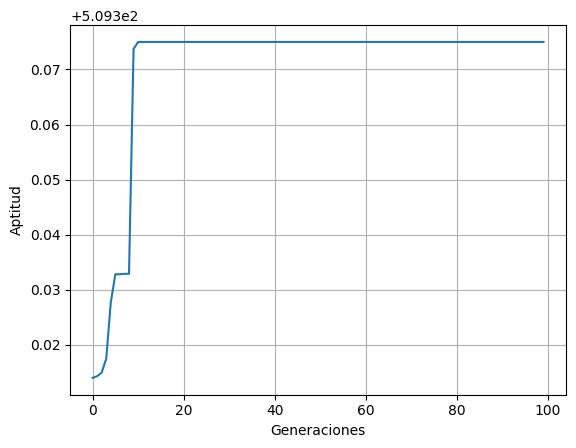

In [37]:
# Graficación
fig,ax=plt.subplots()
ax.plot(range(i),listAptitud)
ax.set_xlabel('Generaciones')  
ax.set_ylabel('Aptitud')
ax.grid(True)
plt.show()

#### Análisis 

Dado que el polinomio $P(x) = 5x^5- 3x^4-x^3-5x^2-x-3$ no tiene una raiz en el intervalo [0.5 1] entonces busca un mínimo.

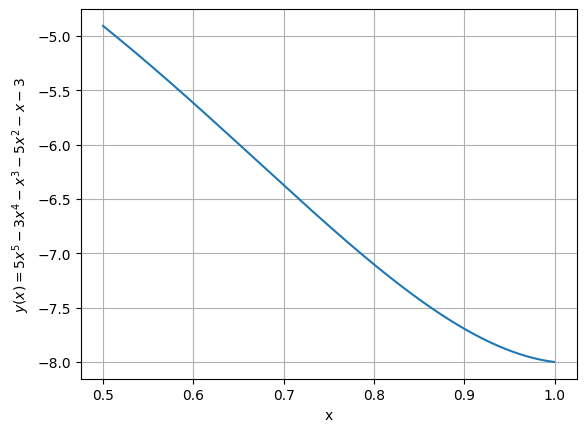

In [38]:
x=np.arange(xi,xf,0.001)
y=5*x**5-3*x**4-x**3-5*x**2-x-3
# Graficación
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set_xlabel('x')  
ax.set_ylabel('$y(x)= 5x^5- 3x^4-x^3-5x^2-x-3$')
ax.grid(True)
plt.show()

### 4. Libreria de python AGs - PyGAD

PyGAD es una libraria open-source de Python que permite construir algoritmos genéticos y optimizar algortimos de machine learn. Soporta varios tipos de cruces, mutaciones y otros operadores. Mediante la personalización de la función de aptitud se pueden optimizar diversos problemas. Tiene una interfaz simple para usuarios con menor experiencia en python y permite una resolución de problemas incluso más rápido que otras librerias. (Gad, 2021; PyGAD - Python Genetic Algorithm! — PyGAD 2.18.1 documentation, s. f.)

#### Ejemplo

El ejemplo que se va aserguir esta en PyGAD - Python Genetic Algorithm! — PyGAD 2.18.1 documentation (s. f.)

Considere que quiere optimar los pesos de la siguiente función:

y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44


In [39]:
# Se colocan las entradas y salidas deseadas

function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

# Función de aptitud la cual para cada solución

def fitness_func(solution, solution_idx):
    output = np.sum(solution*function_inputs)
    fitness = 1.0 / np.abs(output - desired_output)
    return fitness


Ahora se preparan los parámetros de PyGAD

In [40]:
fitness_function = fitness_func

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

Se crea una instancia de la clase pygad.GA

In [41]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

/home/esteban/.local/lib/python3.10/site-packages/pygad/pygad.py:503: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


La optimización se inicia con el método run()

In [42]:
ga_instance.run()

Para visualizar los resultados:

In [43]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 4.04365635  3.6232789   4.93544966  4.48323116 -0.32997066  1.75436288]
Fitness value of the best solution = 405.04043227774855
Predicted output based on the best solution : 44.00246888932637


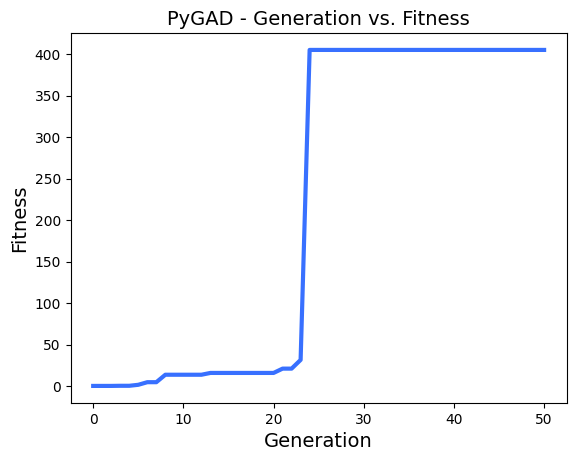

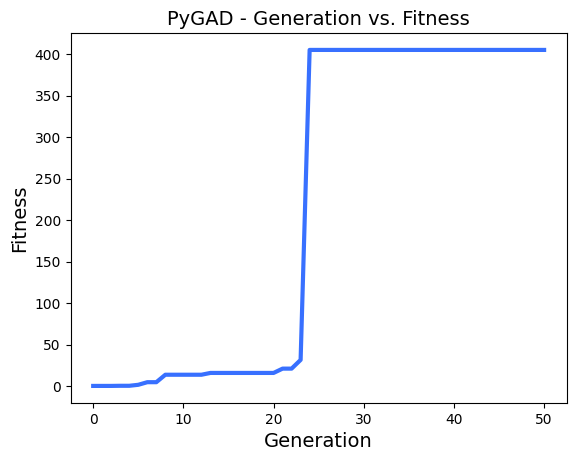

In [44]:
ga_instance.plot_fitness()

### 2. Cincuenta conversaciones

In [5]:
# Conversaciones aletorias
fs = 44100  # Sample rate
seconds = 1  # Duration of recording
audioNumbers=50
# folderRandomAudio='RandomAudio'

# if not os.path.exists(f"./{folderRandomAudio}"):
#     os.makedirs(f"./{folderRandomAudio}")


# for i in range(audioNumbers):
#     randomAudio=np.random.randint(low=0,high=256,size=(math.floor(fs*seconds),1), dtype=np.uint8)
#     wf.write(f'./{folderRandomAudio}/randomAudio{i}.wav', fs, randomAudio)  # Save as WAV file 


In [8]:

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1,dtype='uint8')
sd.wait()  # Wait until recording is finished
wf.write('audio.wav', fs, myrecording)  # Save as WAV file 

In [9]:
fileInput='audio.wav'
fs,data=wf.read(fileInput, mmap=False)
data=data[:math.floor(fs*seconds)]
t=np.arange(len(data))*1/fs
# data.shape

In [10]:
playsound(fileInput)

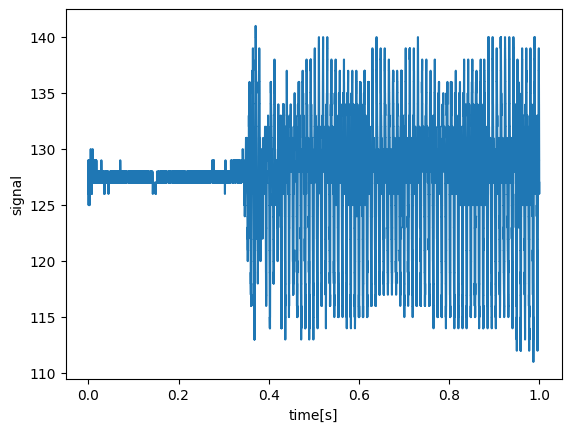

In [12]:
fig,ax=plt.subplots()
ax.plot(t,data)
ax.set_ylabel('signal')
ax.set_xlabel('time[s]')
plt.show()


#### Desarrollo del algoritmo genético

In [16]:
def genera(K,l):
    pob=[]
    for _ in range(K):
        pob.append(np.random.randint(low=0,high=2,size=l).tolist()) 
    return pob

def decodificar(cromosoma,bitsGenes):
    decodificacion=[]
    for i in range(0,len(cromosoma),bitsGenes):
        # print(f'i: {i}')
        gen=cromosoma[i:bitsGenes+i]
        # print(f'gen: {gen}')
        auxDecodificacion=0
        for j in range(bitsGenes):
            auxDecodificacion+=gen[j]*2**j
        decodificacion.append(auxDecodificacion)
    return decodificacion

def Func_ap(cromosoma,ValorDeseado,bitsGenes):
    croDec=decodificar(cromosoma,bitsGenes)

    aptDeseada=np.sum(np.asarray(ValorDeseado))
    aptObtenida=np.sum(np.asarray(croDec))

    restaObtDes=np.asarray(ValorDeseado)-np.asarray(croDec)
    sumaAbsRes=np.sum(np.absolute(restaObtDes))

    # print(f'valor deseado: {aptDeseada}, valor obtenido: {aptObtenida}, resta absoluta: {sumaAbsRes} ')

    return 1/sumaAbsRes


def eval_apt(pob,ValorDeseado,bitsGenes):
    '''
    input
    pob: población total (lista Kxl)

    output
    probabilidad de cada cromosoma (lista K)
    '''
    apt_crom = []
    apt_pob = 0
    for i in range(len(pob)):
        crom = pob[i]
        apt = Func_ap(crom,ValorDeseado,bitsGenes)
        apt_pob += apt
        apt_crom.append(apt)
    probab = []
    for i in range(len(pob)):
        prob_crom = apt_crom[i]/apt_pob
        probab.append(prob_crom)
    return probab

def seleccion(pob, probab):
    j = 0
    K = len(pob)
    limite = 2 * max(probab)
    pob_nueva = []
    while j < K: 
        i = 0 
        while i < K: 
            aleat = random.uniform(0, limite)
            if probab[i] > aleat: 
                pob_nueva.append(pob[j])
                j += 1
                if j >= K:
                    break
            i +=1
            if i == K:
                i = 0
    return pob_nueva

def cruce(pob_nueva): 
    i = 0 
    K = len(pob_nueva)

    if K%2==1:
        K-=1

    # print(f'k: {K}')
    hijos =[]
    while i < K:
        crom1 = pob_nueva[i]
        crom2 = pob_nueva[i+1]
        pt = np.random.randint(1, len(crom1)-1)
        hijo1 = crom1[:pt] + crom2[pt:]
        hijo2 = crom2[:pt] + crom1[pt:]
        hijos.append(hijo1)
        hijos.append(hijo2)
        i = i +2; 
    return hijos

def mutacion(hijos, pm, l):
    K = len(hijos)
    totalbits = K * l 
    segmento = 1/pm 
    n_mutaciones = totalbits/segmento
    i = 0 
    while i < n_mutaciones: 
        muta = np.random.randint(0, totalbits-1)
        x = math.floor(muta/l) 
        y = muta%l
        if hijos[x][y] == 0: 
            hijos[x][y] = 1 
        else: 
            hijos[x][y] = 0 
        i += 1
    return hijos

def Alg_Genetico(l, M, K, p_mut,ValorDeseado,bitsGenes,fs):

    '''
    l: Longitud de cromosoma (int)
    M: Número de temporadas (int)
    K: Población o número de cromosomas (int)
    p_mut: probabilidad de mutación (float)
    bitGenes: Cantidad de genes que tiene cada bit (int)
    fs: Frecuencia de muestreo (int)
    '''

    pob = genera(K,l)  #Se genera aleatoriamente la población 
    probab = eval_apt(pob,ValorDeseado,bitsGenes) #Se evalúa esa primera población
    mejor_apt_AG = 0
    lisMejorAptAG=[]
    

    # mejor_cromo_AG = [0,0,0,0,0,0,0,0,]
    i =0;                    #Es la primera generación 
    while i < M:     #Mientras no se ejecuten todas las generaciones
        n_pob = seleccion(pob, probab) #Selecciona, los nuevo padres  
        # print(f'n_pob :{n_pob}')
        # np.savetxt('test.txt', n_pob, delimiter=',')
        
        hijos = cruce(n_pob)           #Cruce de los padres generan hijos
        # hijos=n_pob
        pob = mutacion(hijos, p_mut, l)   #Se mutan los hijos para generar otra población       
        probab = eval_apt(pob,ValorDeseado,bitsGenes) #Se evalua la población i, se calcula la probabilidad de selección           
        mejor_prob = max(probab)
        mejor_posic = probab.index(max(probab))
        mejor_crom = pob[mejor_posic]
        mejor_apt = Func_ap(mejor_crom,ValorDeseado,bitsGenes)
        lisMejorAptAG.append(mejor_apt)
        if mejor_apt > mejor_apt_AG:
            mejor_apt_AG = mejor_apt
            mejor_cromo_AG = mejor_crom
        # x1,x2,x3,x4,x5 = decodifica(mejor_cromo_AG)
        # print("gen ",i,"A =",x1,"B =",x2,"C =",x3,"D =",x4,"E =",x5,"valor de la función", mejor_apt_AG)
        i = i + 1                       #Se incrementa el contador de generaciones
        print(f'Generaciones: {i}')

        fig,ax=plt.subplots()
        ax.plot(range(i),lisMejorAptAG)
        ax.set_ylabel('signal')
        ax.set_xlabel('Generaciones')
        plt.show()
        
    #print("generacion ", i, "Mejor solución  x", xAG, "valor de la función", yAG)

    # folderRandomAudioAG='RandomAudioAG'

    # if not os.path.exists(f"./{folderRandomAudioAG}"):
    #     os.makedirs(f"./{folderRandomAudioAG}")
        

    # for i in range(len(pob)):
    #     wf.write(f'./{folderRandomAudioAG}/randomAudioAG{i}.wav',
    #      fs, np.asarray(decodificar(pob[i],bitsGenes),dtype = np.uint8))  # Save as WAV file 
        
    return mejor_cromo_AG

Generaciones: 1


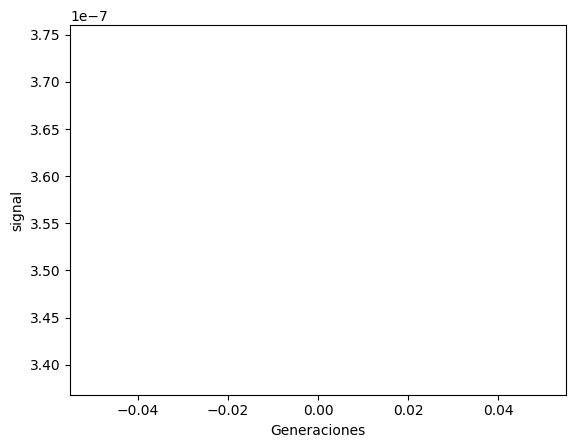

Generaciones: 2


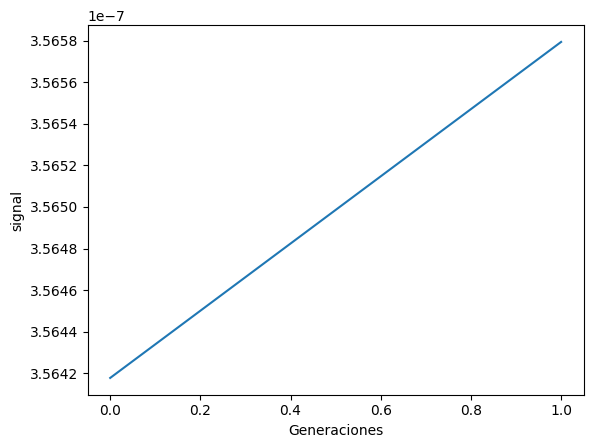

Generaciones: 3


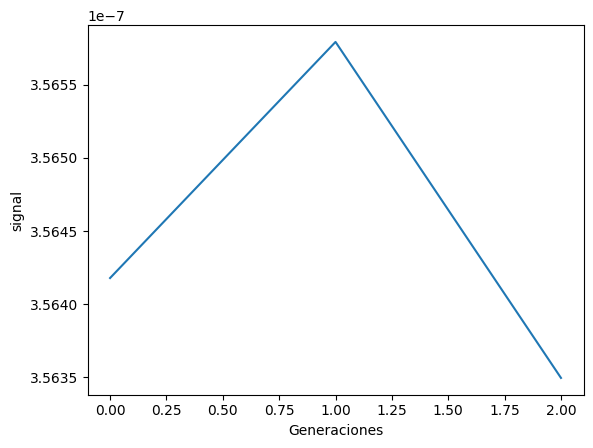

In [17]:
ValorDeseado=data.tolist()
bitsGenes=8 
l=math.floor(fs*seconds)*bitsGenes #Longitud del cromosoma
M=3 # Número de épocas
K=50 # Número de poblaciones o cromosomas
p_mut=0.1 #Probabilidad de mutación
resultado=Alg_Genetico(l, M, K, p_mut,ValorDeseado,bitsGenes,fs)

In [18]:
fileOutput='resultado.wav'
resultadoDecodifocado=decodificar(resultado,bitsGenes)
resultadoDecodifocado=np.asarray(resultadoDecodifocado,dtype = np.uint8)
wf.write(fileOutput, fs, resultadoDecodifocado)  # Save as WAV file 
playsound(fileOutput)

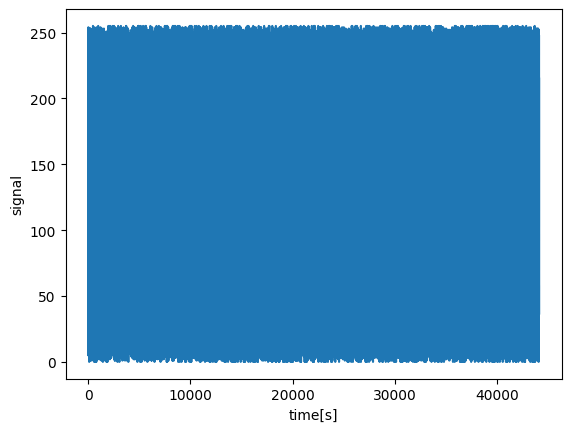

In [19]:
fig,ax=plt.subplots()
ax.plot(resultadoDecodifocado)
ax.set_ylabel('signal')
ax.set_xlabel('time[s]')
plt.show()

#### Análisis

No se logró por el momento llegar a la respuesta preferida por el alto grado de insensibilidad que tiene la función de aptitud.

## Referencias

Gad, A. F. (2021b). PyGAD: An Intuitive Genetic Algorithm Python Library (arXiv:2106.06158). arXiv. http://arxiv.org/abs/2106.06158

PyGAD - Python Genetic Algorithm! —PyGAD 2.18.1 documentation. (s. f.). Recuperado 6 de diciembre de 2022, de https://pygad.readthedocs.io/en/latest/

## Links de consulta

Para grabar sonido
https://realpython.com/playing-and-recording-sound-python/#recording-audio

Guardar Audio
https://python-sounddevice.readthedocs.io/en/0.3.12/api.html#sounddevice.rec

Leer .wav
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

crear carpeta
https://www.geeksforgeeks.org/how-to-create-directory-if-it-does-not-exist-using-python/